In [1]:
install.packages('mclust')

Installing package into ‘/opt/r’
(as ‘lib’ is unspecified)



In [2]:
library(ggplot2)
library(cluster)
library(mclust)

Package 'mclust' version 6.0.0
Type 'citation("mclust")' for citing this R package in publications.



## import data

In [3]:
#importing shots 
shots <- read.table(file = 'shots_by_position.tsv', sep = '\t', header = TRUE)

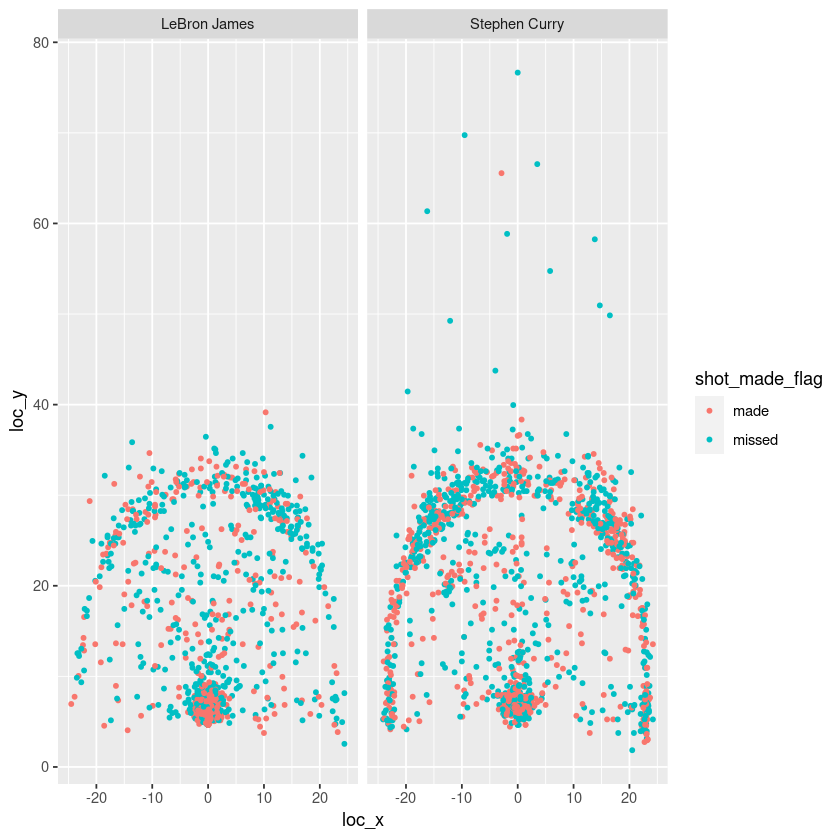

In [4]:
ggplot(shots, aes(loc_x, loc_y, color = shot_made_flag)) + geom_point(size = 1) + facet_wrap (~player_name)

To give a general idea where the shots are made and missed, the diagram above was created for reference.

## Stephen Curry Data Analysis

In [5]:
SCshot <- shots[shots$player_name == 'Stephen Curry',]
SCmadeshot <- SCshot[SCshot$shot_made_flag == 'made',]
SCmissedshot <- SCshot[SCshot$shot_made_flag == 'missed',]

### plotting the general location where the shots were made in respect to shots that were made or missed.

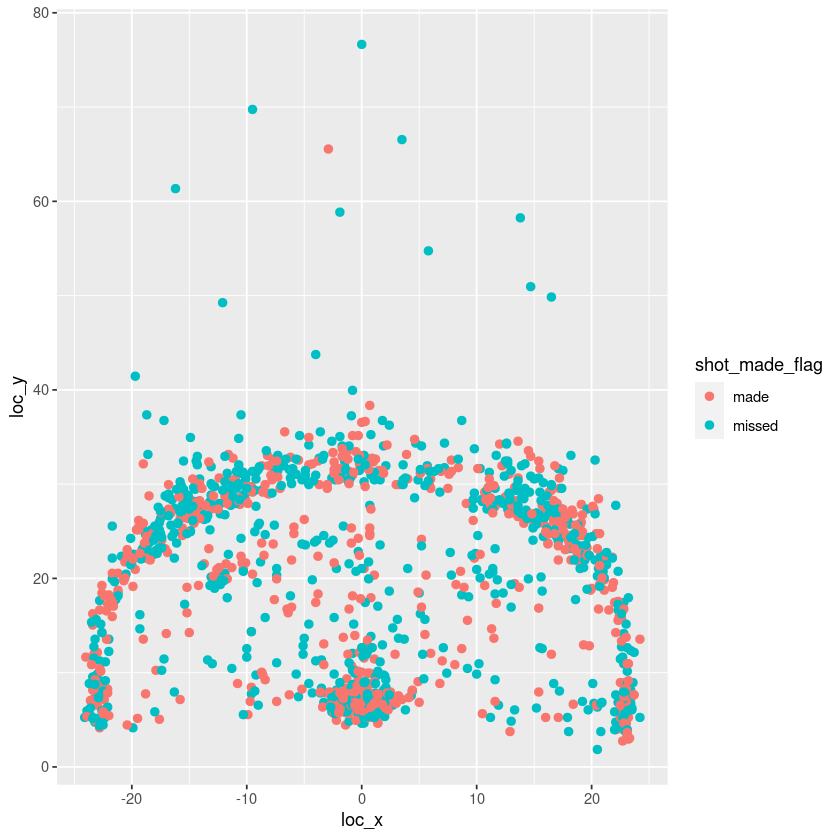

In [6]:
ggplot(SCshot, aes(loc_x, loc_y, color = shot_made_flag)) + geom_point(size = 2)

## Analysis on Stephen Curry's made shot

### Elbow Method to find the optimal number of k (clusters)

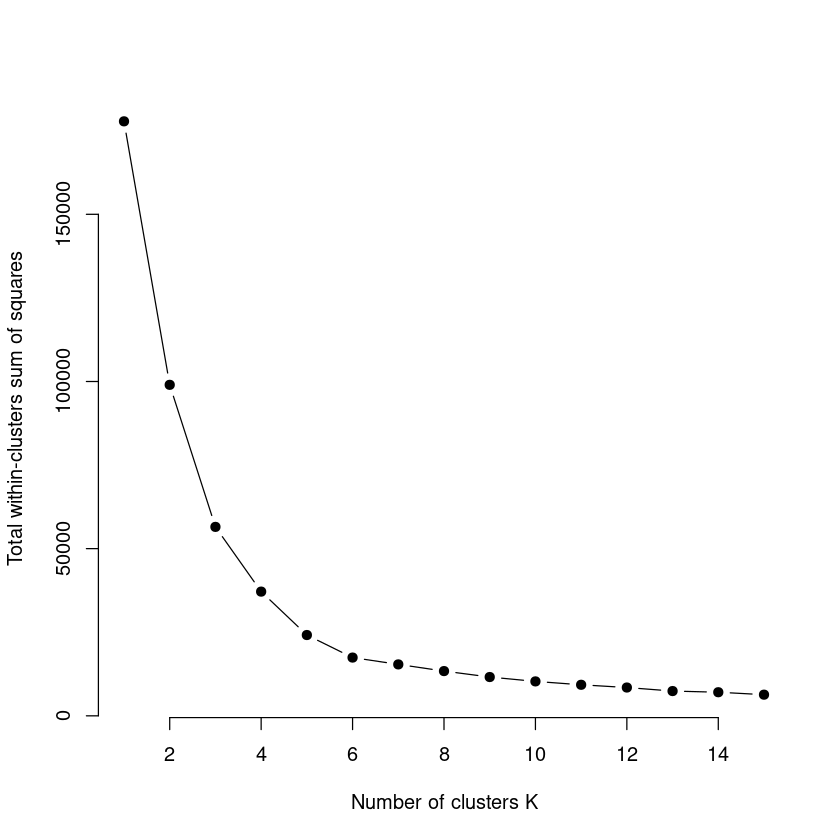

In [7]:
#Elbow Method for finding the optimal number of clusters
k.max <- 15 #max 150 (num of obs)
twcss <- sapply(1:k.max, 
              function(k){kmeans(SCmadeshot[, 3:4], k, nstart=20)$tot.withinss})

plot(1:k.max, twcss,
     type="b", pch = 19, frame = FALSE, 
     xlab="Number of clusters K",
     ylab="Total within-clusters sum of squares")


### Silhouette method to determine the optimal value of k (clusters)

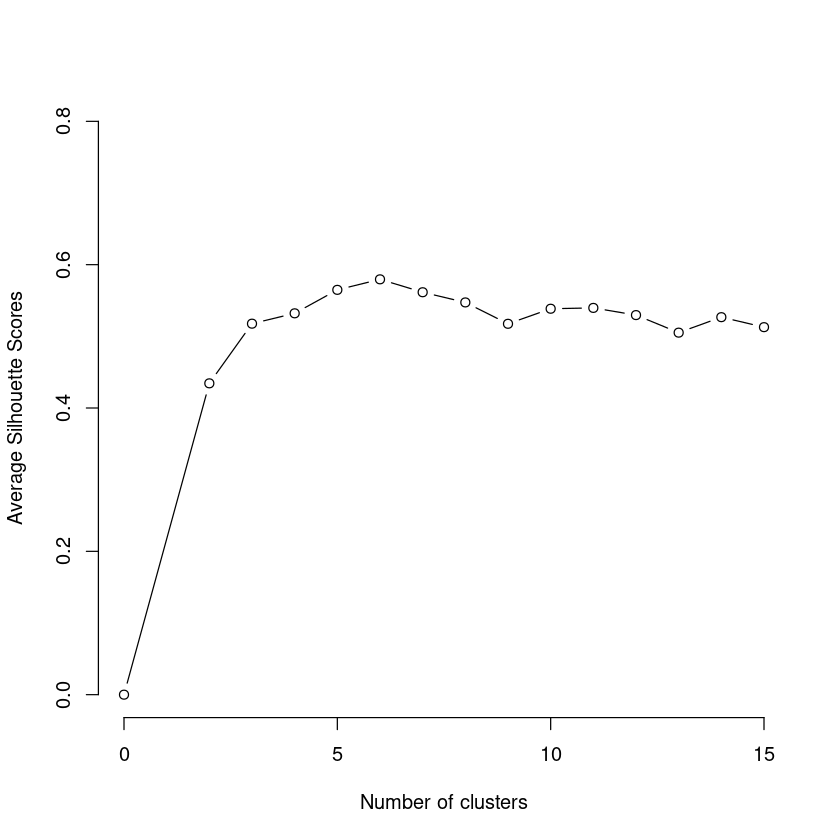

In [8]:
#silhouette method
avg_silhouette_score <- function(k){
  km <- kmeans(SCmadeshot[, 3:4], centers = k, nstart=20)
  ss <- silhouette(km$cluster, dist(SCmadeshot[, 3:4], "euclidean"))
  mean(ss[, 3])
}
k <- 2:15 #minimum number of clusters for silhouette scores is 2 for between-cluster variation
avg_sil <- sapply(k, avg_silhouette_score)
k <- c(0, k)
avg_sil <- c(0, avg_sil)
plot(k, avg_sil, type='b', , xlab='Number of clusters', ylab='Average Silhouette Scores', frame=FALSE, ylim = c(0,0.8))

Based on the observations above, the optimal number of clusters for Stephen Curry seems to be 6 when he made the shot. We can observe that the the slope of the elbow plot starts to flatter after k=6. This also agrees with the maximum silhouette score at k = 6 shown in the graph above, which is the optimum number of clusters for the given dataset.

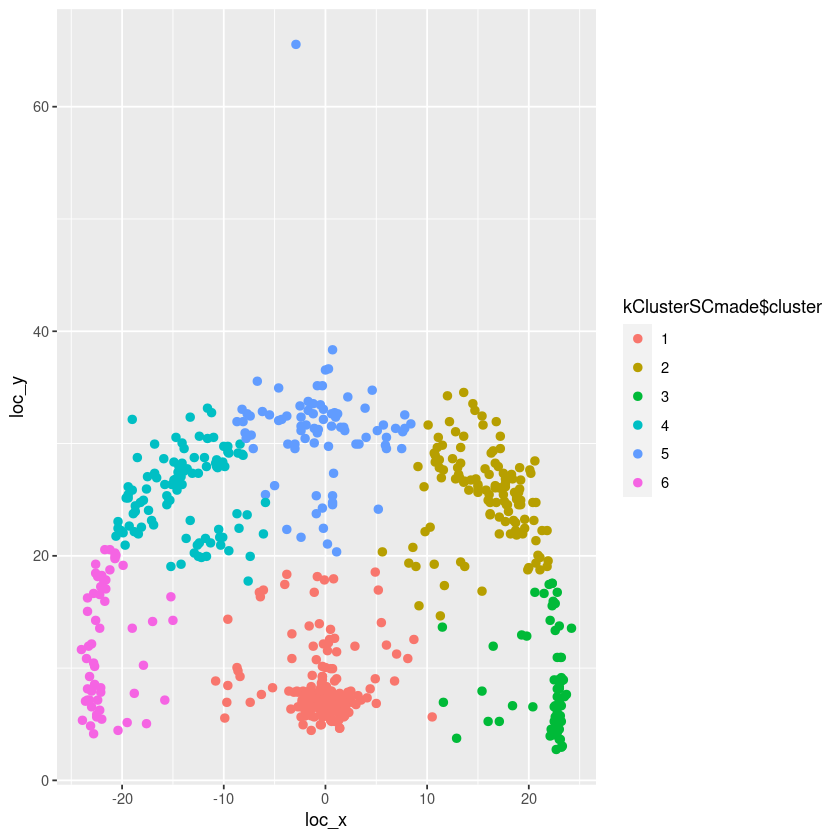

In [9]:
kClusterSCmade <- kmeans(SCmadeshot[, 3:4], 6, nstart = 20)
kClusterSCmade$cluster <- as.factor(kClusterSCmade$cluster)
ggplot(SCmadeshot, aes(loc_x, loc_y, color = kClusterSCmade$cluster)) + geom_point(size = 2)

Above is a diagram for kmeans clustering with the optimal number of clusters k determined by the elbow and silhouette score for Stephen Curry to see where he made the shot and its clusters. 

## Analysis on Stephen Curry's missed shot

### Elbow Method to find the optimal number of k (clusters)

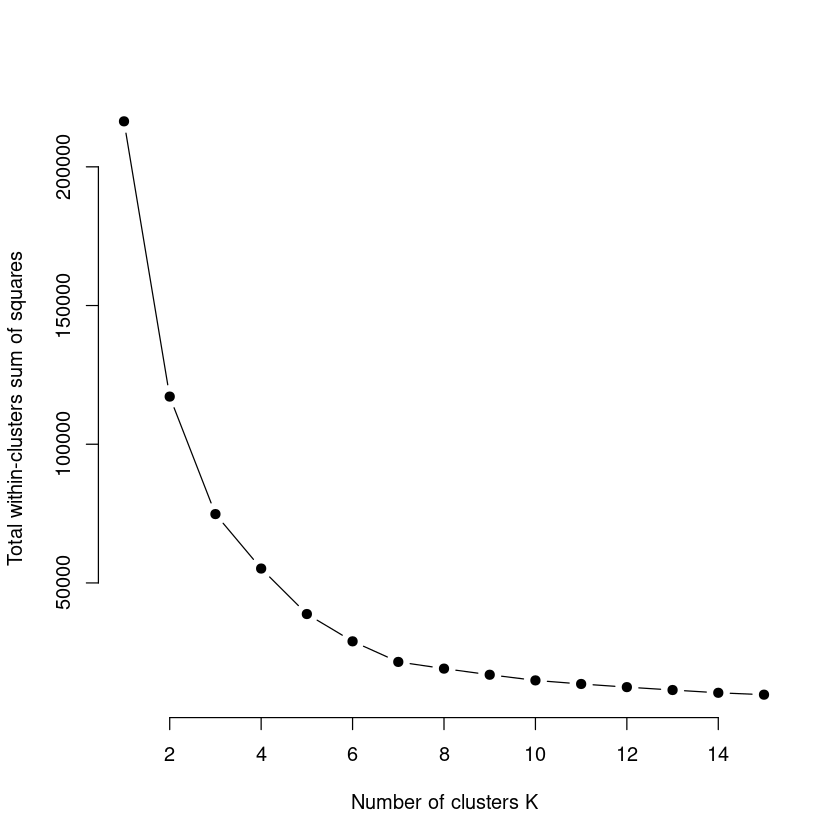

In [10]:
#Elbow Method for finding the optimal number of clusters
k.max <- 15 #max 150 (num of obs)
twcss <- sapply(1:k.max, 
              function(k){kmeans(SCmissedshot[, 3:4], k, nstart=20)$tot.withinss})

plot(1:k.max, twcss,
     type="b", pch = 19, frame = FALSE, 
     xlab="Number of clusters K",
     ylab="Total within-clusters sum of squares")


### Silhouette method to determine the optimal value of k (clusters)

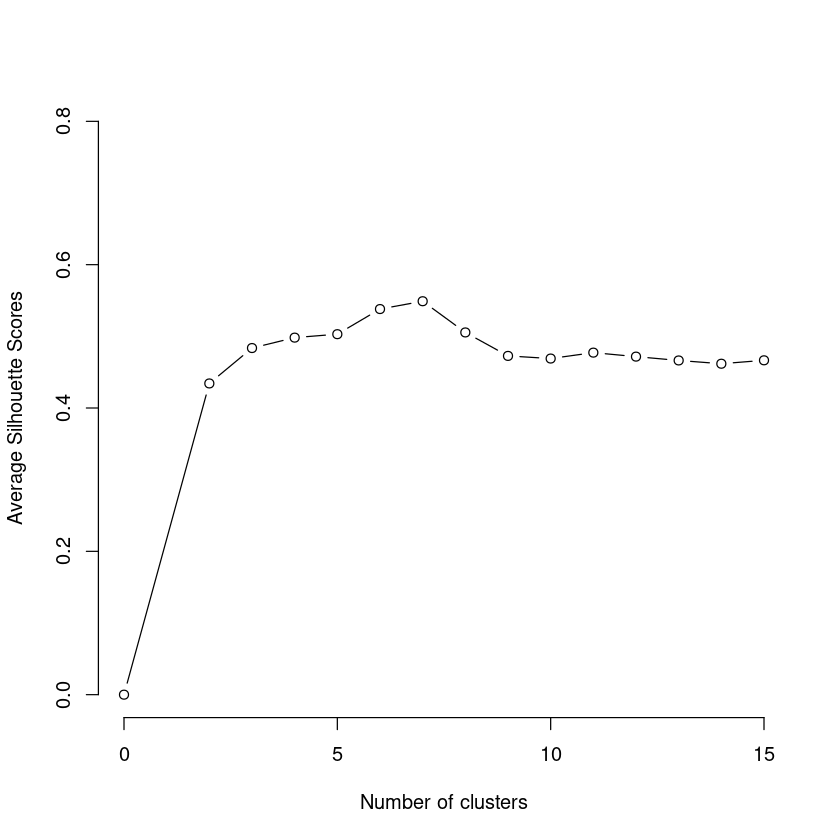

In [11]:
#silhouette method
avg_silhouette_score <- function(k){
  km <- kmeans(SCmissedshot[, 3:4], centers = k, nstart=20)
  ss <- silhouette(km$cluster, dist(SCmissedshot[, 3:4], "euclidean"))
  mean(ss[, 3])
}
k <- 2:15 #minimum number of clusters for silhouette scores is 2 for between-cluster variation
avg_sil <- sapply(k, avg_silhouette_score)
k <- c(0, k)
avg_sil <- c(0, avg_sil)
plot(k, avg_sil, type='b', , xlab='Number of clusters', ylab='Average Silhouette Scores', frame=FALSE, ylim = c(0,0.8))

Based on the observations above, the optimal number of clusters for Stephen Curry seems to be 7 when he made the shot. We can observe that the the slope of the elbow plot starts to flatter after k=7. This also agrees with the maximum silhouette score at k = 7 shown in the graph above, which is the optimum number of clusters for the given dataset.

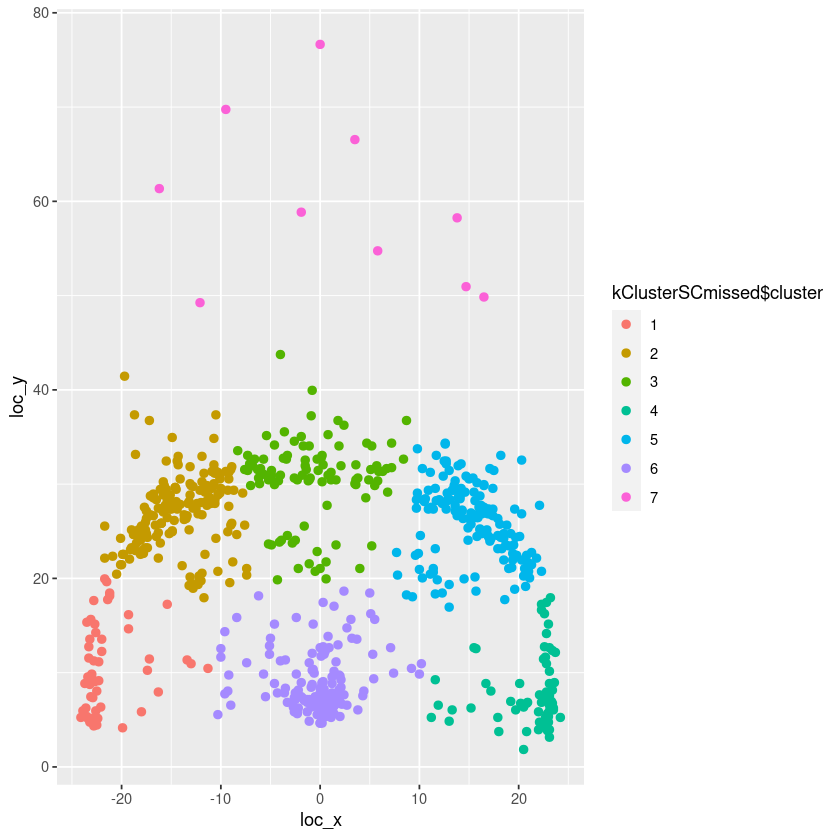

In [12]:
kClusterSCmissed <- kmeans(SCmissedshot[, 3:4], 7, nstart = 20)
kClusterSCmissed$cluster <- as.factor(kClusterSCmissed$cluster)
ggplot(SCmissedshot, aes(loc_x, loc_y, color = kClusterSCmissed$cluster)) + geom_point(size = 2)

Above is a diagram for kmeans clustering with the optimal number of clusters k determined by the elbow and silhouette score for Stephen Curry to see where he missed the shot and its clusters. 

## LeBron James Data Analysis

In [13]:
LJshot<- shots[shots$player_name == 'LeBron James',]
LJmadeshot <-LJshot[LJshot$shot_made_flag =='made',]
LJmissedshot <- LJshot[LJshot$shot_made_flag == 'missed',]

### plotting the general location where the shots were made in respect to shots that were made or missed.

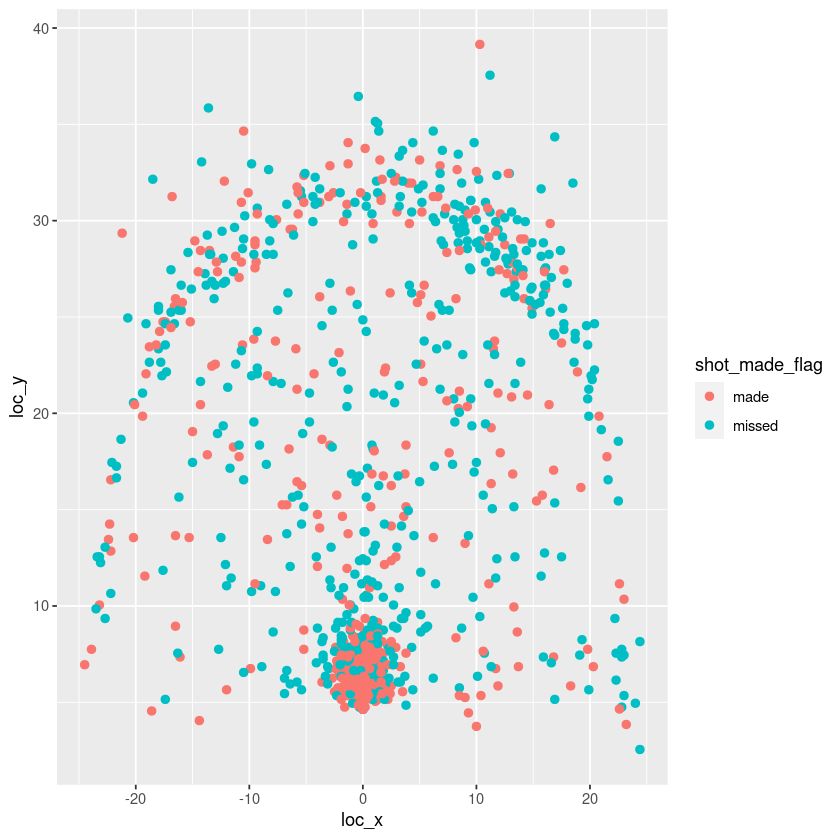

In [14]:
ggplot(LJshot, aes(loc_x, loc_y, color = shot_made_flag)) + geom_point(size = 2)

## Analysis on LeBron James' made shot

### Elbow Method to find the optimal number of k (clusters) on shots that were made by LeBron James

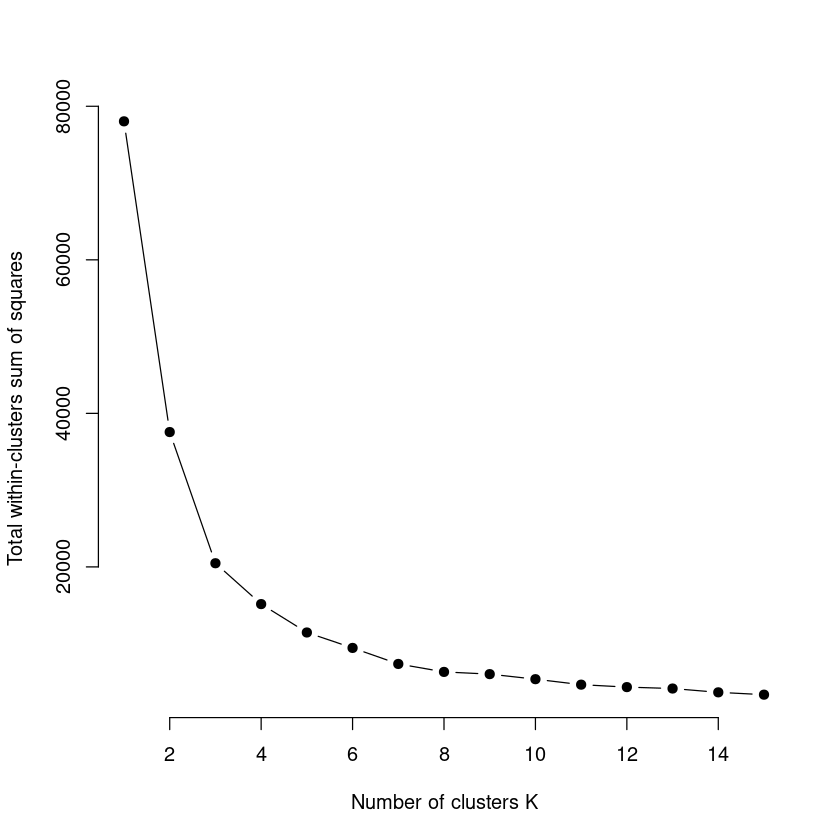

In [18]:
#Elbow Method for finding the optimal number of clusters
# Compute and plot wss for k = 1 to k = 15.
k.max <- 15 #max 150 (num of obs)
twcss <- sapply(1:k.max, 
              function(k){kmeans(LJmadeshot[, 3:4], k, nstart=20)$tot.withinss})

plot(1:k.max, twcss,
     type="b", pch = 19, frame = FALSE, 
     xlab="Number of clusters K",
     ylab="Total within-clusters sum of squares")


### Silhouette method to determine the optimal value of k (clusters)

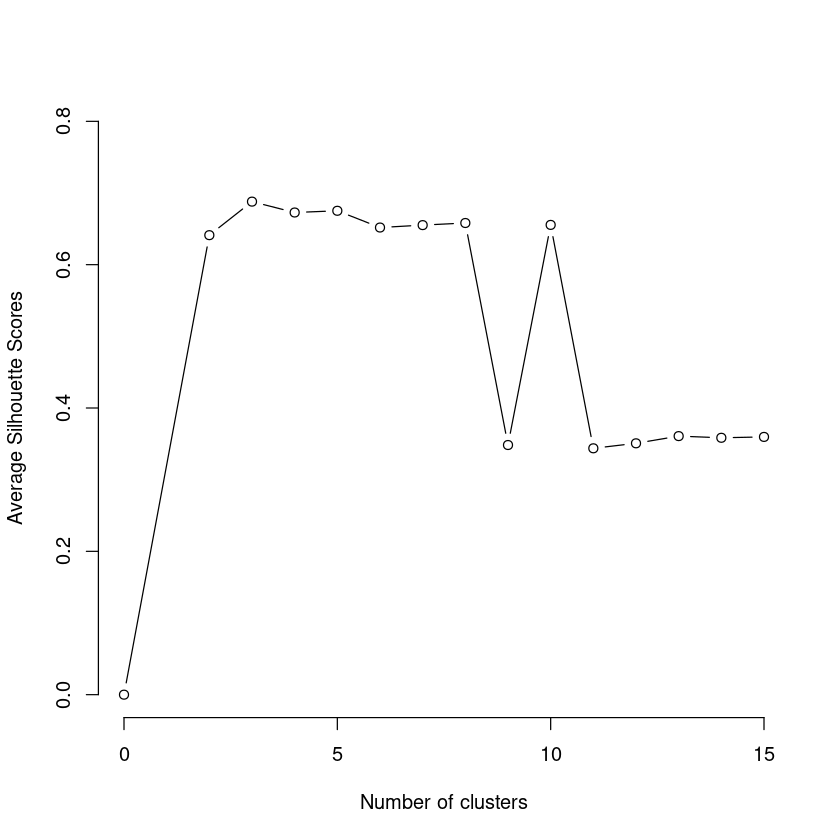

In [19]:
#silhouette method
avg_silhouette_score <- function(k){
  km <- kmeans(LJmadeshot[, 3:4], centers = k, nstart=20)
  ss <- silhouette(km$cluster, dist(LJmadeshot[, 3:4], "euclidean"))
  mean(ss[, 3])
}

k <- 2:15 #minimum number of clusters for silhouette scores is 2 for between-cluster variation and up to 15 clusters
avg_sil <- sapply(k, avg_silhouette_score)
k <- c(0, k)
avg_sil <- c(0, avg_sil)
plot(k, avg_sil, type='b', , xlab='Number of clusters', ylab='Average Silhouette Scores', frame=FALSE, ylim = c(0,0.8))

Based on the observations above, the optimal number of clusters for LeBron James' made shot seems to be 3 when he made the shot. We can observe that the the slope of the elbow plot starts to flatter after k=3. This also agrees with the maximum silhouette score at k = 3 shown in the graph above, which is the optimum number of clusters for the given dataset.

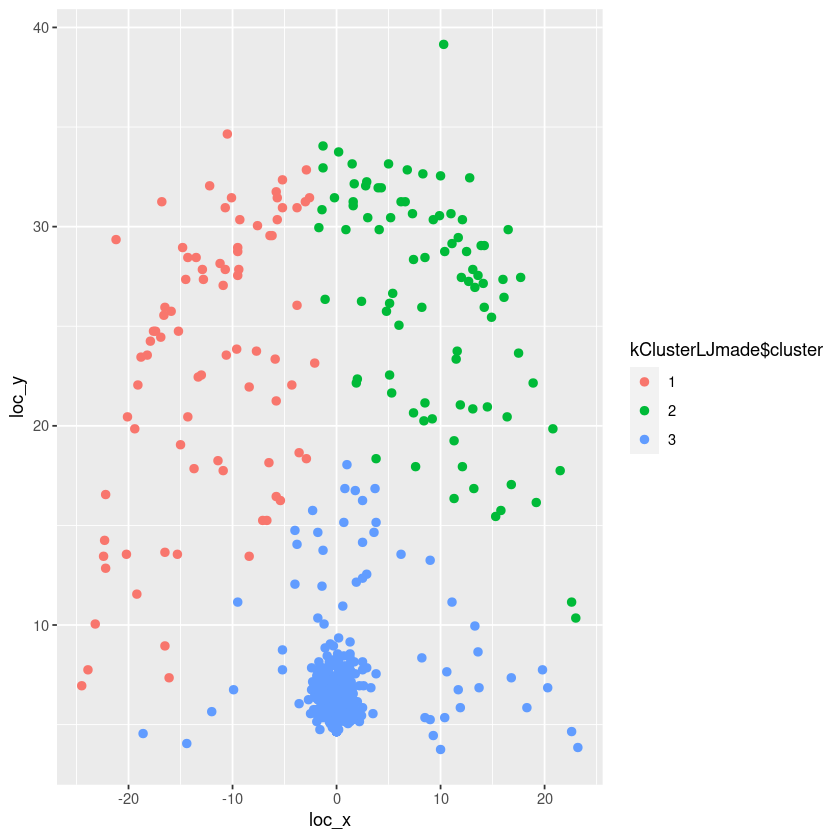

In [20]:
kClusterLJmade <- kmeans(LJmadeshot[, 3:4], 3, nstart = 20)
kClusterLJmade$cluster <- as.factor(kClusterLJmade$cluster)
ggplot(LJmadeshot, aes(loc_x, loc_y, color = kClusterLJmade$cluster)) + geom_point(size = 2)

Above is a diagram for kmeans clustering with the optimal number of clusters k determined by the elbow and silhouette score for LeBron James to see where he made the shot and its clusters. 

## Analysis on LeBron James' missed shot

### Elbow Method to find the optimal number of k (clusters)

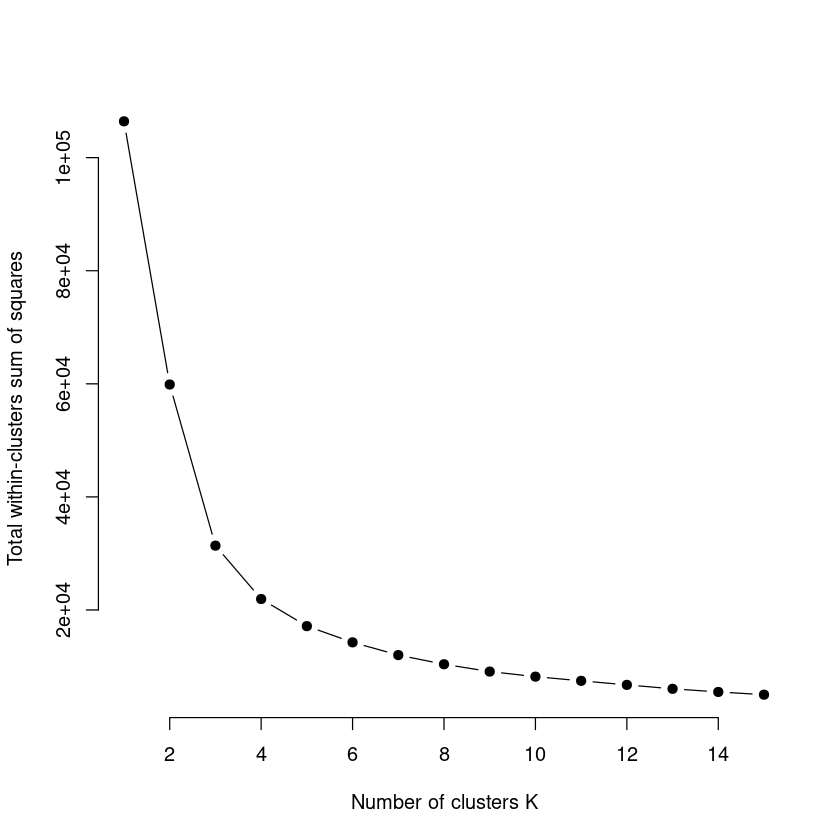

In [21]:
#Elbow Method for finding the optimal number of clusters
# Compute and plot wss for k = 1 to k = 7.
k.max <- 15 #max 150 (num of obs)
twcss <- sapply(1:k.max, 
              function(k){kmeans(LJmissedshot[, 3:4], k, nstart=20)$tot.withinss})

plot(1:k.max, twcss,
     type="b", pch = 19, frame = FALSE, 
     xlab="Number of clusters K",
     ylab="Total within-clusters sum of squares")


### Silhouette method to determine the optimal value of k (clusters)

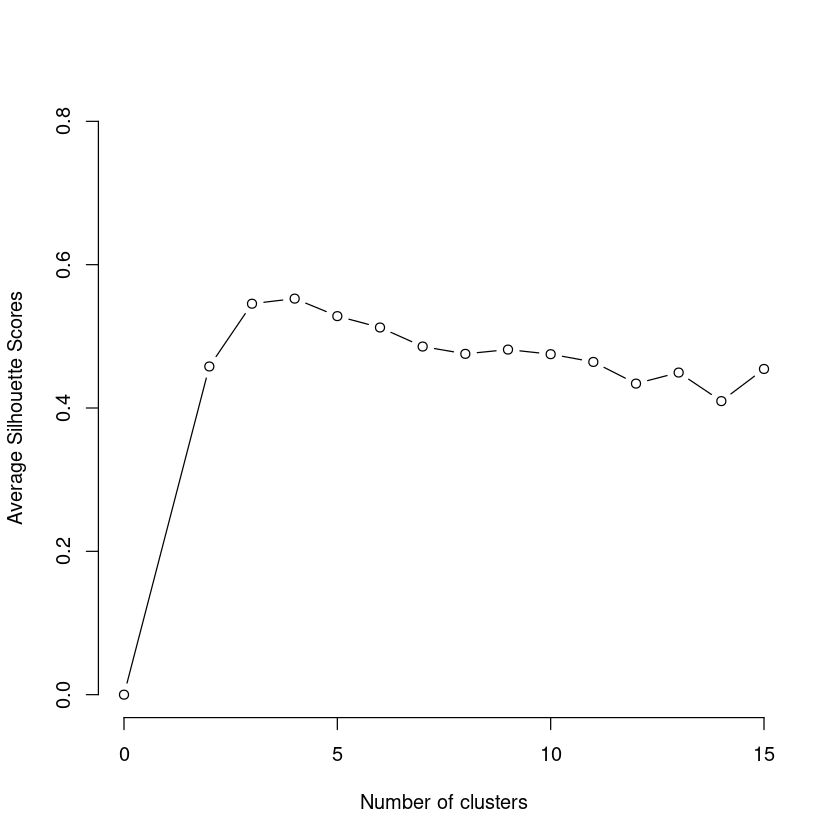

In [22]:
#silhouette method
avg_silhouette_score <- function(k){
  km <- kmeans(LJmissedshot[, 3:4], centers = k, nstart=20)
  ss <- silhouette(km$cluster, dist(LJmissedshot[, 3:4], "euclidean"))
  mean(ss[, 3])
}
k <- 2:15 #minimum number of clusters for silhouette scores is 2 for between-cluster variation
avg_sil <- sapply(k, avg_silhouette_score)
k <- c(0, k)
avg_sil <- c(0, avg_sil)
plot(k, avg_sil, type='b', , xlab='Number of clusters', ylab='Average Silhouette Scores', frame=FALSE, ylim = c(0,0.8))

Based on the observations above, the optimal number of clusters for LeBron James' missed shot seems to be 4 when he made the shot. We can observe that the the slope of the elbow plot starts to flatter after k=4. This also agrees with the maximum silhouette score at k = 4 shown in the graph above, which is the optimum number of clusters for the given dataset.

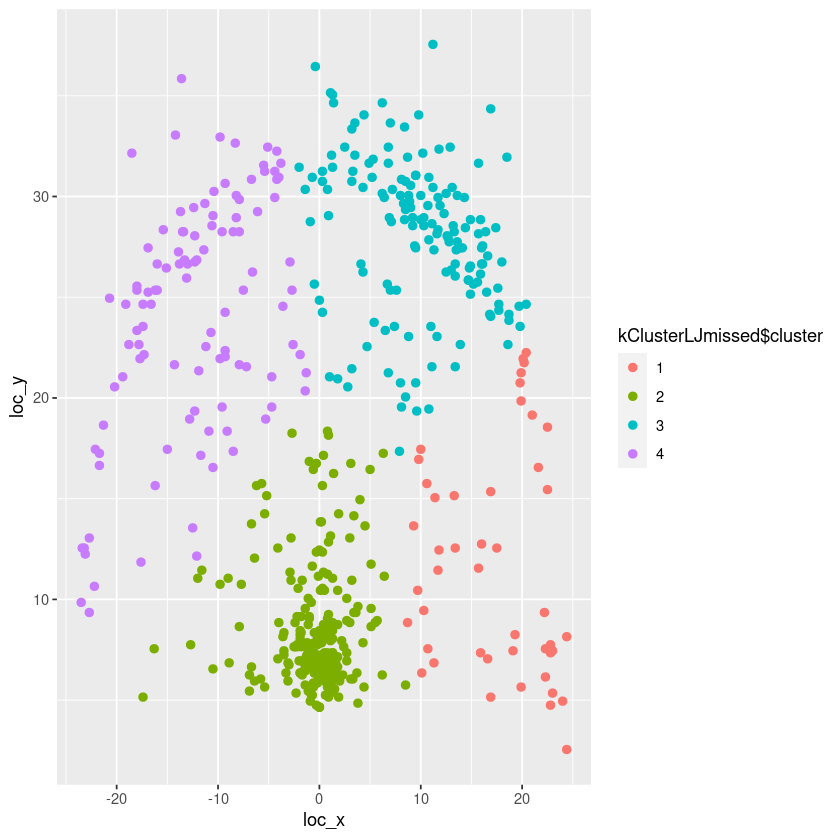

In [23]:
kClusterLJmissed <- kmeans(LJmissedshot[, 3:4], 4, nstart = 20)
kClusterLJmissed$cluster <- as.factor(kClusterLJmissed$cluster)
ggplot(LJmissedshot, aes(loc_x, loc_y, color = kClusterLJmissed$cluster)) + geom_point(size = 2)

Above is a diagram for kmeans clustering with the optimal number of clusters k determined by the elbow and silhouette score for LeBron James to see where he missed the shot and its clusters. 

### USING MCLUST (Gaussina Mixture Modeling) to see the best number of clusters for both of the players in order to compare that to k-means clustering method and to help visualize where he made the shot

[1] -4092.526

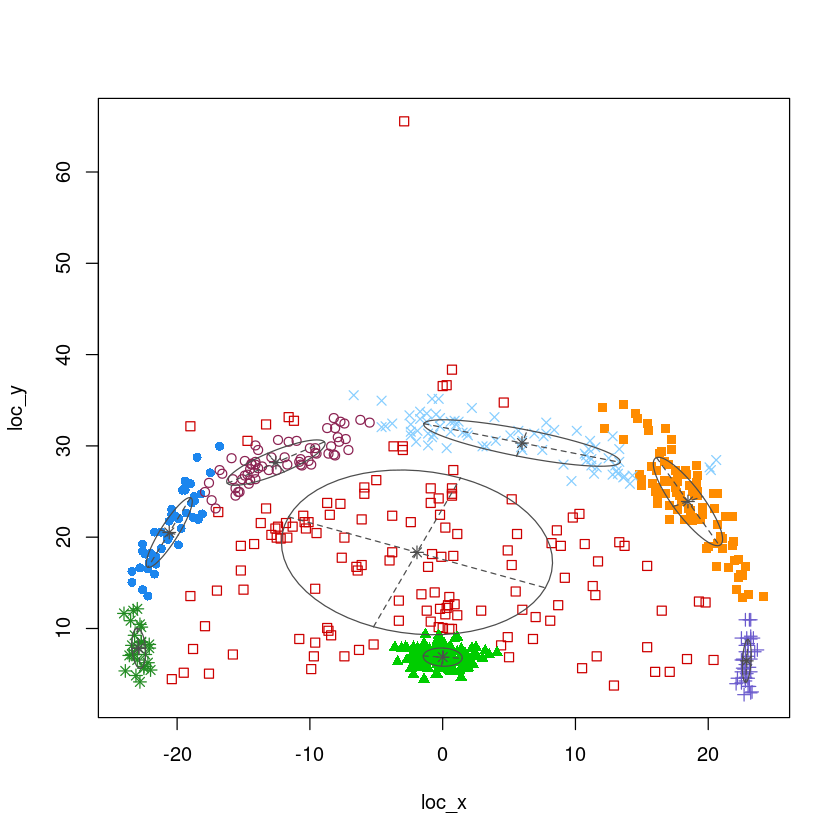

In [24]:
# Select 4 continuous variables and look for three distinct groups.
mcl.model <- Mclust(SCmadeshot[, 3:4], parameters=TRUE)
mcl.model$loglik
# Plot our results.
plot(mcl.model, what = "classification", main = "Mclust Classification")
#The optimal number of clusters for Stephen Curry's made shot dataset is 8 based on gaussian mixture model.

[1] -4843.566

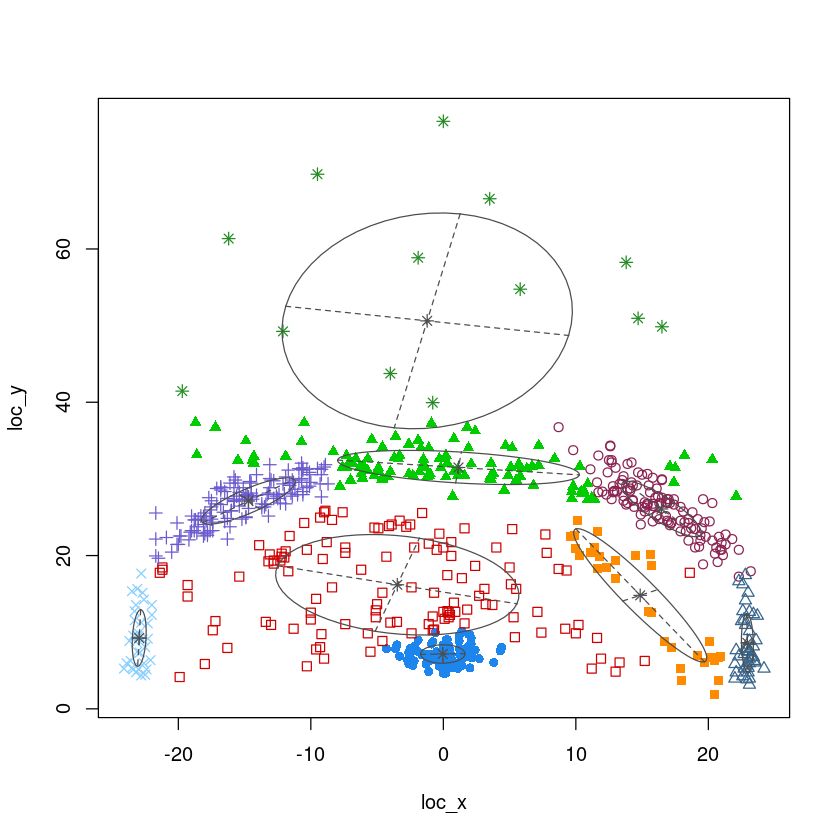

In [25]:
# Select 4 continuous variables and look for three distinct groups.
mcl.model <- Mclust(SCmissedshot[, 3:4], parameters=TRUE)
mcl.model$loglik
# Plot our results.
plot(mcl.model, what = "classification", main = "Mclust Classification")
#The optimal number of clusters for Stephen Curry's missed shot dataset is 9 based on gaussian mixture model.

[1] -2930.96

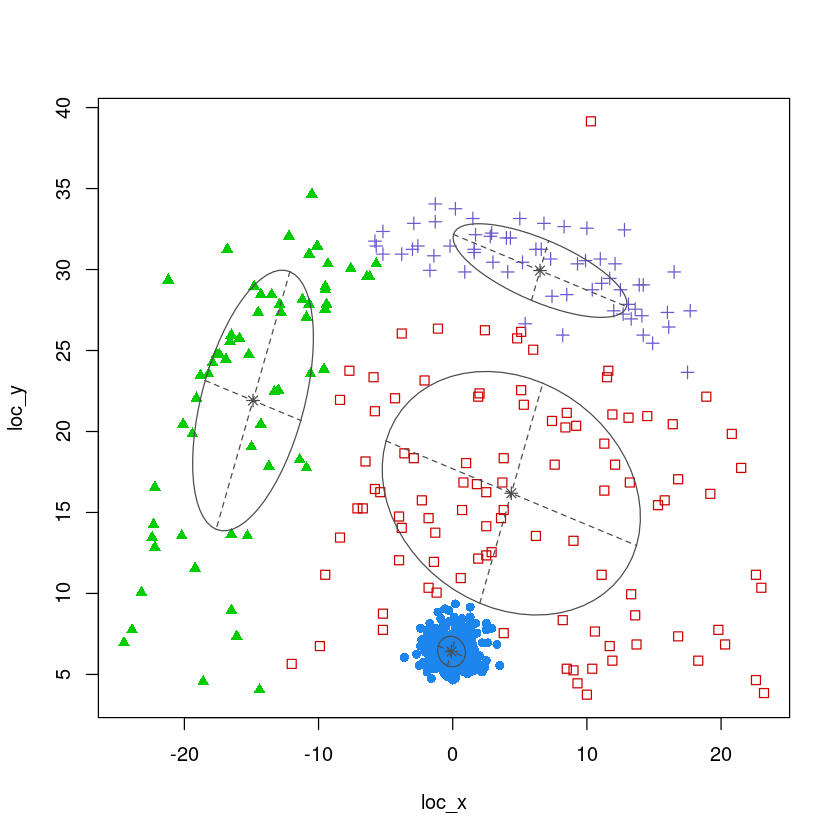

In [26]:
# Select 4 continuous variables and look for three distinct groups.
mcl.model <- Mclust(LJmadeshot[, 3:4], parameters=TRUE)
mcl.model$loglik
# Plot our results.
plot(mcl.model, what = "classification", main = "Mclust Classification")
#The optimal number of clusters for LeBron James' made shot dataset is 4 based on gaussian mixture model.

[1] -3536.374

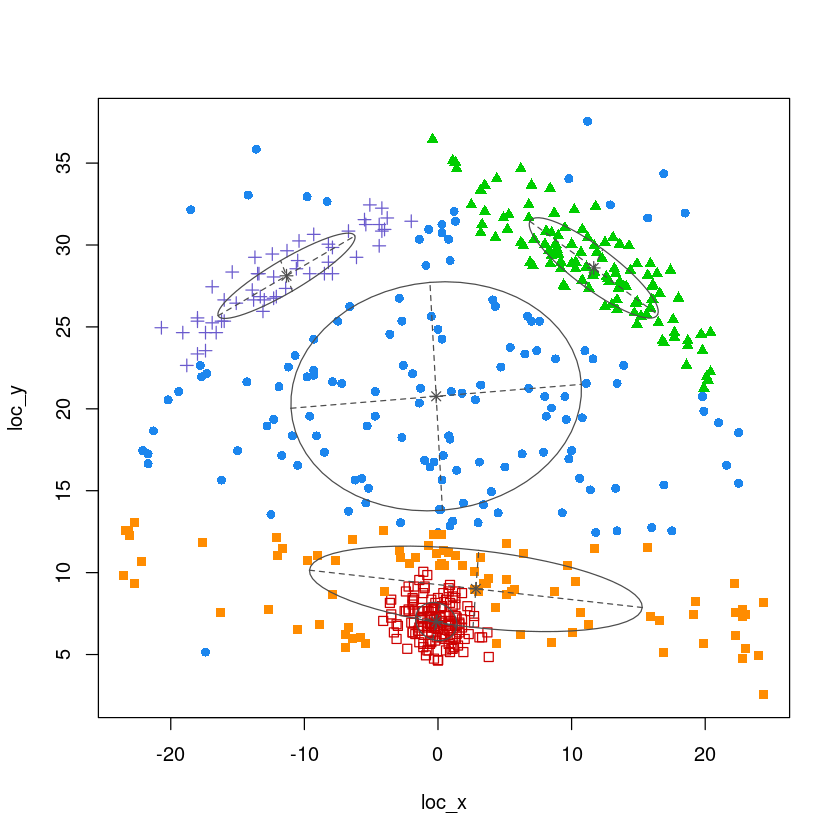

In [27]:
# Select 4 continuous variables and look for three distinct groups.
mcl.model <- Mclust(LJmissedshot[, 3:4], parameters=TRUE)
mcl.model$loglik
# Plot our results.
plot(mcl.model, what = "classification", main = "Mclust Classification")
#The optimal number of clusters for LeBron James' missed shot dataset is 5 based on gaussian mixture model.

Q1) Briefly describe which value of K is the best fit for LeBron James and Steph Curry made / missed shots respectively?.

For Stephen Curry, the value of K that is best fit for Stephen Curry for k-means clustering method is 6 for made shots and 7 for missed shot. If we cluster using Guassian Mixture Modeling, the value of K that is best fit for Stphen Curry is a 8 and 9 for made and missed shot, respectively. On the other hand, for LeBron James, the value of K that is best fit for LeBron James for k-means clustering method is 3 for made shots and 4 for missed shot. If we cluster using Guassian Mixture Modeling, the value of K that is best fit for LeBron James is a 4 and 5 for made and missed shot, respectively.

Q2) What can you conclude from this data about differences in shooting between Stephen Curry and Lebron James? 

Based on the number of clusters, there is a difference in shooting betwen Stephen Curry and LeBron James. We can observe that Stephen Curry's shots are on the outeredge where 3 pointer shots are usually made. There seems to be wider range of area he can shoot from whether that'd be missed or made. On the other hand, LeBron James have fewer clusters in the outeredge of the basketball court where 3 pointer shots are made. Based on this data, we can conclude that Stephen Curry shoots along the 3 pointer edge of the court covering greater surface area than LeBron James who typically stays away from the right and left corners closer to the basketball corut.

Q3)Why is Gaussian Mixture modelling a good or a bad approach to model this data?

Gaussian Mixture modeling is a good approach for this model because there are some uncertainty in the where the points in the belong in the intersection of clusters. Here the intersection of the clusters will be the location where the shots and there can be uncertainty in which cluster it belongs to. By making a Gaussian Mixture model where it represents all the points as a single distribution made up of a linear combination of differen Guassian models, we can assign membership by position in full distribution with respect to the each sub-distribution, giving weight mean across all points in the maximization step. This way there will be no harsh cut offs for each clusters, which is evident in k-means clustering.

Bonus Q) What would be a good biological dataset to perform Gaussian Mixture modelling with?

I think a good biological dataset to perform Gaussian Mixture modeling with is a genomic expression study. The Gaussian Mixture Model will particularly be useful when comparing gene expression level when there is a mutation or an epigenetic change. By observing the cluster of expression changes that is related to the mutation, we can analyze the differences between the mutated cluster versus the original cluster. This can be further analyzed by applying the distribution in certain types of disease, such as cancer, to understand in a single gene level or certain mutations that may stimulate those diseases more. 